# Convolutional Neural Network

In [1]:
#-------------------------------------------------------------------------------------------#
#                                             Framework                                     #
#-------------------------------------------------------------------------------------------#

import numpy as np
import pandas as pd
import return_data

#--------------------------------------------------------------------------------------------#
#                                             Read Data                                      #
#--------------------------------------------------------------------------------------------#

parity_matrix_path = 'Matlab/matrix_generated/Mat_LCP_Parity.mat'               # L -> Pseudo random
random_matrix_path = 'Matlab/matrix_generated/Mat_LCP_Urand2.mat'               # R -> True random
parity_matrix_name = 'Mat_coef_recortada'
random_matrix_name = 'Mat_coef_recortada'

block_size      = 260       # Mejor resultado: 220x220
size1           = 57        # 9248 -> 2^5 · 17^2
size2           = 114
transform_type  = 'dct'     # dft, dct

X, y = return_data.return_Xy(parity_matrix_path, parity_matrix_name, random_matrix_path, random_matrix_name, block_size, transform_type)

#--------------------------------------------------------------------------------------------#
#                                             DataFrame                                      #
#--------------------------------------------------------------------------------------------#

df_pixel = pd.DataFrame(X)
df_pixel .insert(loc=0, column='Label', value=y)
display  (df_pixel)

Blocks calculated
Blocks transformed
Creating pandas dataframe
X and y variables created


,Label,0,1,2,3,4,5,6,7,8,...,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497
0,0.0,0.576265,-0.184216,0.115267,-0.082054,0.067353,-0.053054,0.043476,-0.044006,0.037209,...,-0.006171,0.000501,-0.005517,-0.001840,-0.004226,0.005288,0.004768,-0.002739,0.002410,0.000071
1,0.0,0.573120,-0.193422,0.116968,-0.074085,0.066246,-0.057553,0.044461,-0.040293,0.030275,...,-0.000901,-0.003521,0.000427,0.005628,0.000380,-0.001754,-0.004233,0.002303,-0.001333,-0.003778
2,0.0,0.571596,-0.197279,0.116359,-0.078885,0.065738,-0.054290,0.042370,-0.032842,0.031982,...,0.002175,-0.002100,-0.005314,-0.000923,-0.001372,0.005670,0.006226,-0.005664,0.000391,-0.004244
3,0.0,0.575515,-0.193357,0.117514,-0.083320,0.062996,-0.046121,0.052902,-0.034720,0.032633,...,0.001465,-0.005195,0.001475,0.002598,-0.001742,0.004680,-0.007449,0.003478,0.001029,-0.000719
4,0.0,0.577620,-0.190585,0.118527,-0.081501,0.062750,-0.052864,0.039736,-0.034641,0.028693,...,-0.005651,0.001313,0.000926,0.002443,0.005461,0.004609,-0.002995,-0.006052,0.005606,0.006566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,1.0,0.579688,-0.185465,0.121648,-0.080297,0.061311,-0.060347,0.040032,-0.034950,0.041160,...,0.003742,0.008416,0.000721,-0.002589,-0.003428,-0.001767,0.004328,0.005219,-0.001053,-0.000141
6494,1.0,0.573934,-0.194582,0.121371,-0.084862,0.069203,-0.047506,0.039199,-0.033583,0.031179,...,0.006393,-0.005874,0.004367,0.001022,-0.002055,0.004097,-0.000035,0.004518,-0.001487,0.000474
6495,1.0,0.573285,-0.191749,0.116836,-0.079682,0.066441,-0.052514,0.045492,-0.039095,0.027629,...,0.001270,0.004616,0.001821,0.002154,0.001290,-0.002838,0.007260,0.003680,-0.006298,-0.004964
6496,1.0,0.579624,-0.188875,0.119317,-0.083101,0.058091,-0.046604,0.060994,-0.038054,0.033655,...,0.005045,0.008292,0.008306,-0.002166,-0.003397,0.003239,-0.000435,-0.001122,-0.002676,-0.004636


In [2]:
# small_df = df_pixel[df_pixel.columns[:2001]]
# size1, size2 = 40, 50

# display  (small_df)
# df_pixel = small_df

## Plot Data


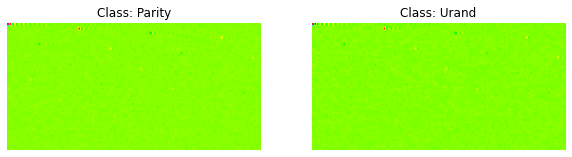

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
label = ['Parity', 'Urand']
for i in range (len(label)):
    plt.subplot(1, 2, i+1)
    img = df_pixel[df_pixel['Label']==i].iloc[0,1:].values
    img = img.reshape((size1, size2))
    plt.imshow(img, cmap='hsv')
    plt.title("Class: " + label[i])
    plt.axis('off')
    
plt.show()

## Reshape

Para poder usar las imágenes obtenidas estas se van a transformar a tensores cuya forma será [size1 x size2 x 1]. Se escoge esta forma debido a que las imágenes son en blanco y negro y por ello sólo se usará un canal.

In [4]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical     # Label Encoding

X = df_pixel.drop(["Label"], axis=1)
y = df_pixel['Label']
y = to_categorical(y, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = X_train.values.reshape(-1, size1, size2, 1)
X_test  = X_test.values.reshape (-1, size1, size2, 1)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)


X_train shape (4548, 57, 114, 1)
X_test shape (1950, 57, 114, 1)
y_train shape (4548, 2)
y_test shape (1950, 2)


# Implementación de la red neuronal convolucional

Usaremos **Adam Optimizer**. Adam es un algoritmo de optimización que se puede utilizar en lugar del procedimiento de descenso de gradiente estocástico clásico para actualizar los pesos de la red de forma iterativa en función de los datos de entrenamiento. Es diferente al descenso de gradiente estocástico clásico. SGD busca una tasa de aprendizaje única para todas las ponderaciones y la tasa de aprendizaje (alfa) no cambia durante el proceso de entrenamiento. Sin embargo, en adam optimizer podemos decir que adam optimizer actualiza la tasa de aprendizaje de forma dinámica.
<br>
<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png" />

In [5]:
from keras.optimizers import RMSprop, Adam

optimizer = Adam(learning_rate=0.001, 
                 beta_1=0.9, 
                 beta_2=0.999, 
                 epsilon=None, 
                 decay=0.0, 
                 amsgrad=False)

In [6]:
#-------------------------------------------------------------------------------------------#
#                                             Framework                                     #
#-------------------------------------------------------------------------------------------#

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D

#-------------------------------------------------------------------------------------------#
#                                               Model                                       #
#-------------------------------------------------------------------------------------------#

model = Sequential()    # Linear Layering

model.add(Conv2D(16, (3, 3), input_shape = (size1, size2, 1), activation = 'relu'))         # filtros convolucionales 3x3
model.add(MaxPooling2D(pool_size = (2, 2)))                                                 # tensor is down-sampled by half. Agrupacion
model.add(Flatten())                                                                        # flatten, projecting to lower dimensions
model.add(Dense(units = 64, activation = 'relu'))                                           # dense layer with 64 inputs to prevent overfitting
model.add(Dense(units = 2, activation = 'sigmoid'))                                         # activation layer. softmax para recibir probabilidades

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])  # compiling
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 112, 16)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 56, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24192)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1548352   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 1,548,642
Trainable params: 1,548,642
Non-trainable params: 0
_________________________________________________________________


# Training

In [7]:
epochs      = 20
batchSize   = 100

cnn  = model.fit(x= X_train, y= y_train, validation_data=(X_test, y_test), steps_per_epoch = 50, 
                                                        epochs = epochs, validation_steps=10, 
                                                        batch_size=batchSize)

Epoch 1/20
50/50 [==============================] - 28s 216ms/step - loss: 0.6870 - accuracy: 0.5684 - val_loss: 0.6441 - val_accuracy: 0.5140
Epoch 2/20
50/50 [==============================] - 9s 178ms/step - loss: 0.6312 - accuracy: 0.6391 - val_loss: 0.5303 - val_accuracy: 0.9840
Epoch 3/20
50/50 [==============================] - 8s 167ms/step - loss: 0.5078 - accuracy: 0.8380 - val_loss: 0.3795 - val_accuracy: 0.9880
Epoch 4/20
50/50 [==============================] - 8s 154ms/step - loss: 0.3406 - accuracy: 0.9642 - val_loss: 0.2682 - val_accuracy: 0.9790
Epoch 5/20
50/50 [==============================] - 9s 182ms/step - loss: 0.2089 - accuracy: 0.9836 - val_loss: 0.1686 - val_accuracy: 0.9700
Epoch 6/20
50/50 [==============================] - 7s 146ms/step - loss: 0.1356 - accuracy: 0.9857 - val_loss: 0.1105 - val_accuracy: 0.9950
Epoch 7/20
50/50 [==============================] - 7s 148ms/step - loss: 0.0942 - accuracy: 0.9901 - val_loss: 0.0813 - val_accuracy: 0.9920
Epoch

50/50 [==============================] - 3s 69ms/step - loss: 0.0151 - accuracy: 0.9996 - val_loss: 0.0289 - val_accuracy: 0.9950


# Evaluación del modelo

In [8]:
print("Accuracy after fitting: {:.2f}%".format(cnn.history['accuracy'][-1]*100))

Accuracy after fitting: 99.95%


#### Para una mayor precisión, puede aumentar el número de épocas o puede cambiar los parámetros en las capas o puede agregar una capa adicional al modelo.

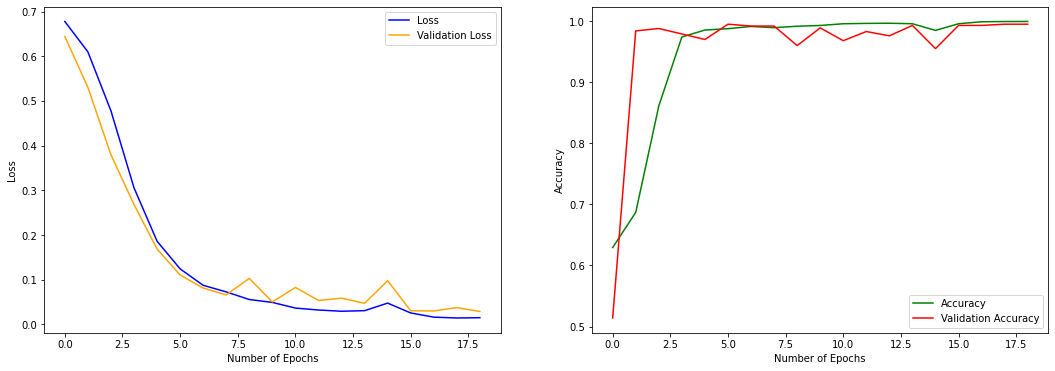

In [9]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(cnn.history['loss'], color="blue", label = "Loss")
plt.plot(cnn.history['val_loss'], color="orange", label = "Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(cnn.history['accuracy'], color="green", label = "Accuracy")
plt.plot(cnn.history['val_accuracy'], color="red", label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()

In [10]:
score = model.evaluate(X_test, y_test)
print("Test Loss: {:.4f}".format(score[0]))
print("Test Accuracy: {:.2f}%".format(score[1]*100))

61/61 [==============================] - 1s 19ms/step - loss: 0.0291 - accuracy: 0.9949
Test Loss: 0.0291
Test Accuracy: 99.49%


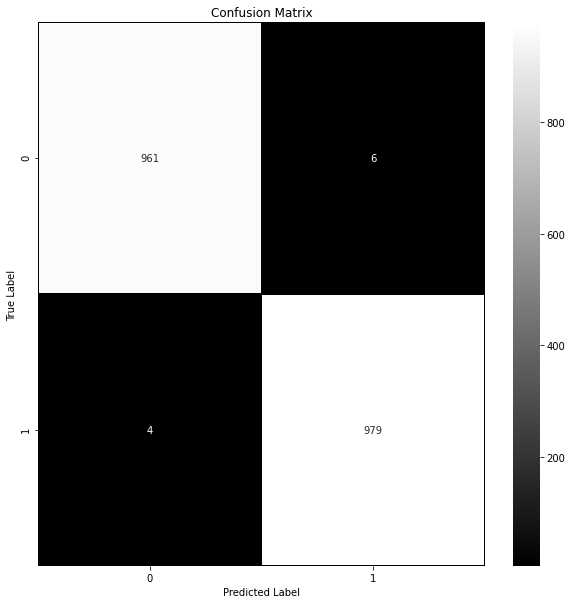

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(y_test, axis = 1)
confusionMatrix = confusion_matrix(Y_true, Y_pred_classes)

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusionMatrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# Delete a few variables for space reasons
%reset_selective -f X_train, X_test, y_train, y_test

# Testing new Data

## 1 bit displaced

In [13]:
parity_matrix_path = 'Matlab/matrix_generated/Mat_LCP_Parity_1_displaced.mat'    # L -> New Pseudo random

#-------------------------------------------------------------------------------------------#

# block_size, size1, size2 = 260, 57, 114
X, y = return_data.return_Xy(parity_matrix_path, parity_matrix_name, random_matrix_path, random_matrix_name, block_size, transform_type)

df_pixel = pd.DataFrame(X)
df_pixel .insert(loc=0, column='Label', value=y)

# small_df = df_pixel[df_pixel.columns[:401]]
# size1, size2 = 40, 50
# df_pixel = small_df

X = df_pixel.drop(["Label"], axis=1)
y = df_pixel['Label']

X = X.values.reshape(-1, size1, size2, 1)
y = to_categorical(y, num_classes=2)

#-------------------------------------------------------------------------------------------#

score = model.evaluate(X, y)
print("1 bit displaced Loss: {:.4f}".format(score[0]))
print("1 bit displaced Accuracy: {:.2f}%".format(score[1]*100))

Blocks calculated
Blocks transformed
Creating pandas dataframe
X and y variables created
204/204 [==============================] - 4s 18ms/step - loss: 0.0052 - accuracy: 0.9994
1 bit displaced Loss: 0.0052
1 bit displaced Accuracy: 99.94%


## 2 bits displaced

In [14]:
parity_matrix_path = 'Matlab/matrix_generated/Mat_LCP_Parity_2_displaced.mat'    # L -> New Pseudo random

#-------------------------------------------------------------------------------------------#
# block_size, size1, size2 = 260, 57, 114
X, y = return_data.return_Xy(parity_matrix_path, parity_matrix_name, random_matrix_path, random_matrix_name, block_size, transform_type)

df_pixel = pd.DataFrame(X)
df_pixel .insert(loc=0, column='Label', value=y)

# small_df = df_pixel[df_pixel.columns[:401]]
# size1, size2 = 40, 50
# df_pixel = small_df

X = df_pixel.drop(["Label"], axis=1)
y = df_pixel['Label']

X = X.values.reshape(-1, size1, size2, 1)
y = to_categorical(y, num_classes=2)

#-------------------------------------------------------------------------------------------#

score = model.evaluate(X, y)
print("2 bits displaced Loss: {:.4f}".format(score[0]))
print("2 bits displaced Accuracy: {:.2f}%".format(score[1]*100))

Blocks calculated
Blocks transformed
Creating pandas dataframe
X and y variables created
204/204 [==============================] - 4s 20ms/step - loss: 0.0295 - accuracy: 0.9949
2 bits displaced Loss: 0.0295
2 bits displaced Accuracy: 99.49%


## 3 bits displaced

In [15]:
parity_matrix_path = 'Matlab/matrix_generated/Mat_LCP_Parity_3_displaced.mat'    # L -> New Pseudo random

#-------------------------------------------------------------------------------------------#
# block_size, size1, size2 = 260, 57, 114
X, y = return_data.return_Xy(parity_matrix_path, parity_matrix_name, random_matrix_path, random_matrix_name, block_size, transform_type)

df_pixel = pd.DataFrame(X)
df_pixel .insert(loc=0, column='Label', value=y)

# small_df = df_pixel[df_pixel.columns[:401]]
# size1, size2 = 40, 50
# df_pixel = small_df

X = df_pixel.drop(["Label"], axis=1)
y = df_pixel['Label']

X = X.values.reshape(-1, size1, size2, 1)
y = to_categorical(y, num_classes=2)

#-------------------------------------------------------------------------------------------#

score = model.evaluate(X, y)
print("3 bits displaced Loss: {:.4f}".format(score[0]))
print("3 bits displaced Accuracy: {:.2f}%".format(score[1]*100))

Blocks calculated
Blocks transformed
Creating pandas dataframe
X and y variables created
204/204 [==============================] - 5s 21ms/step - loss: 2.3563 - accuracy: 0.5220
3 bits displaced Loss: 2.3563
3 bits displaced Accuracy: 52.20%


## 1 bit reversed

In [16]:
parity_matrix_path = 'Matlab/matrix_generated/Mat_LCP_Parity_1_reversed.mat'    # L -> New Pseudo random

#-------------------------------------------------------------------------------------------#
# block_size, size1, size2 = 260, 57, 114
X, y = return_data.return_Xy(parity_matrix_path, parity_matrix_name, random_matrix_path, random_matrix_name, block_size, transform_type)

df_pixel = pd.DataFrame(X)
df_pixel .insert(loc=0, column='Label', value=y)

# small_df = df_pixel[df_pixel.columns[:401]]
# size1, size2 = 40, 50
# df_pixel = small_df

X = df_pixel.drop(["Label"], axis=1)
y = df_pixel['Label']

X = X.values.reshape(-1, size1, size2, 1)
y = to_categorical(y, num_classes=2)

#-------------------------------------------------------------------------------------------#

score = model.evaluate(X, y)
print("1 bit reversed Loss: {:.4f}".format(score[0]))
print("1 bit reversed Accuracy: {:.2f}%".format(score[1]*100))

Blocks calculated
Blocks transformed
Creating pandas dataframe
X and y variables created
204/204 [==============================] - 4s 18ms/step - loss: 3.5995 - accuracy: 0.4998
1 bit reversed Loss: 3.5995
1 bit reversed Accuracy: 49.98%
